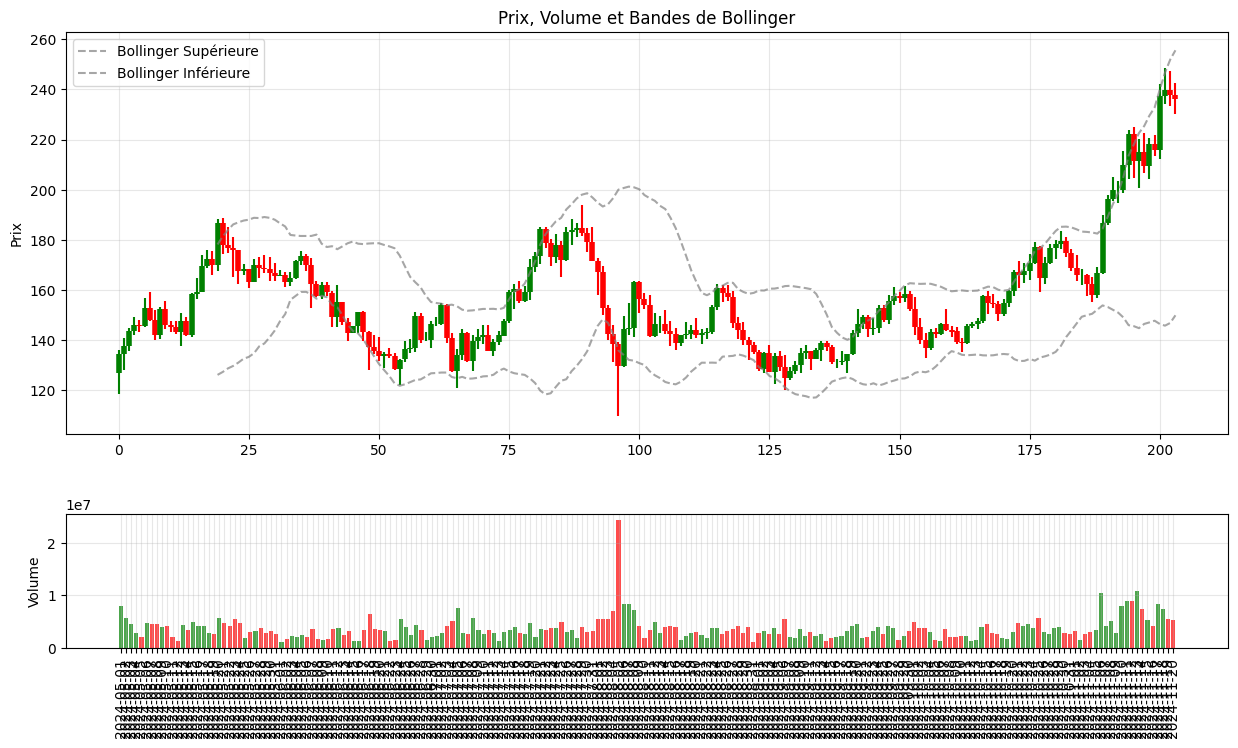

In [16]:
from src.mtal.data_collect import (
    get_pair_df,
    get_spot_pairs,
    get_stock_data,
    get_ticker_names,
)
from src.mtal.analysis import compute_BB
from src.mtal.dataviz import plot_price_history
import polars as pl

df = get_pair_df(
            pair="SOLUSDT",
            limit=300,
            frequency="1d",
            start_time="01/05/24",
            # start_time="01/02/23",
        )
df = df.with_columns(pl.Series(name="idx", values=range(len(df))))
df = compute_BB(df) 
plot_price_history(df, limit=len(df))

In [10]:
df = df[:-5]

In [18]:
from src.mtal.froment.tasse_hanse import detect_cup_handle
best_setup = detect_cup_handle(df)

print(best_setup)

if best_setup:
    plot_price_history(df, price=best_setup['resistance_level'], start_idx=best_setup['begin'], end_idx=best_setup['end'], limit=len(df))

False


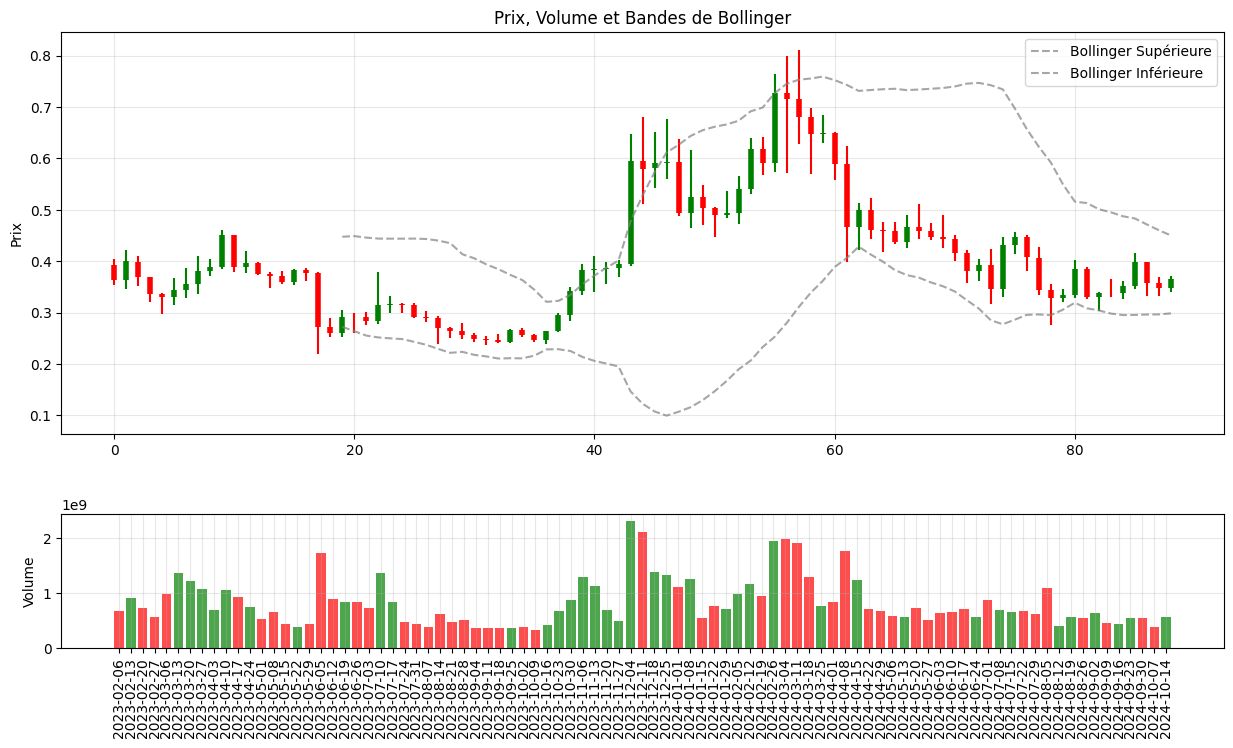

In [17]:
from pathlib import Path

def _load_test_data(pair: str) -> pl.DataFrame:
    path = Path("tests/data") / f"{pair.lower()}_data.parquet"
    df = pl.read_parquet(path)
    if "idx" not in df.columns:
        df = df.with_columns(pl.Series(name="idx", values=range(len(df))))
    return df


plot_price_history(_load_test_data("no_bb_begin"), limit=len(df))

In [15]:
from pathlib import Path

test_data_path = Path("tests/data")
output_path = test_data_path / f"wifusdt_data.parquet"
df.write_parquet(output_path)

In [5]:
import os
from pathlib import Path

# Créer le dossier tests/data s'il n'existe pas
test_data_path = Path("tests/data")
test_data_path.mkdir(parents=True, exist_ok=True)

# Liste des paires à sauvegarder
pairs = ["SOLUSDT", "TRXUSDT", "DOGEUSDT", "WIFUSDT", "AAVEUSDT"]

# Paramètres communs
params = {
    "limit": 300,
    "frequency": "1d",
    "start_time": "01/05/24"
}

# Sauvegarder chaque paire
for pair in pairs:
    df = get_pair_df(pair=pair, **params)
    
    # Ajouter l'index
    df = df.with_columns(pl.Series(name="idx", values=range(len(df))))
    
    # Sauvegarder en format parquet
    output_path = test_data_path / f"{pair.lower()}_data.parquet"
    df.write_parquet(output_path)
    
    print(f"Saved {pair} data to {output_path}")

Saved SOLUSDT data to tests/data/solusdt_data.parquet
Saved TRXUSDT data to tests/data/trxusdt_data.parquet
Saved DOGEUSDT data to tests/data/dogeusdt_data.parquet
Saved WIFUSDT data to tests/data/wifusdt_data.parquet
Saved AAVEUSDT data to tests/data/aaveusdt_data.parquet
